# Extracting Sock Data ~ Python Project

                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.098485  0.098913  0.098485  0.098485  469033600   
1980-12-15 00:00:00-05:00  0.093775  0.093775  0.093347  0.093347  175884800   
1980-12-16 00:00:00-05:00  0.086924  0.086924  0.086495  0.086495  105728000   
1980-12-17 00:00:00-05:00  0.088636  0.089064  0.088636  0.088636   86441600   
1980-12-18 00:00:00-05:00  0.091206  0.091634  0.091206  0.091206   73449600   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  


<Axes: xlabel='Date'>

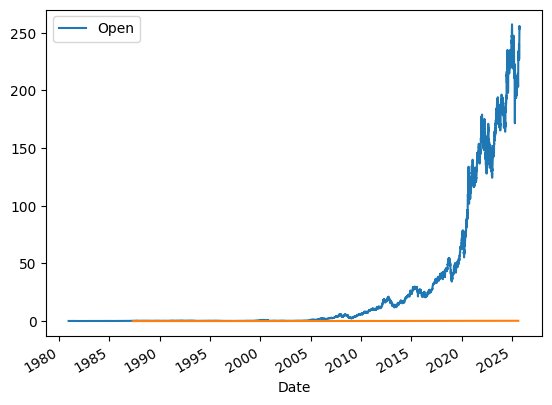

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib as mpl

# Test yf.Ticker
apple = yf.Ticker('AAPL')
apple_share_price_data = apple.history(period="max")
# print(apple_share_price_data.shape)
print(apple_share_price_data.head())
# print(apple_share_price_data.tail())
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data.plot(x='Date', y='Open')
apple.dividends.plot()


In [4]:
import sys

sys.path.append(r'C:\\Code\\Python\\HelperFunctions')
from helperFunctions import download_file

filename = 'apple.json'
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json'
download_file(url, filename)
df = pd.read_csv(filename, header=None)



file download successfully to apple.json


In [ ]:
# JSON object ticker
import json

filename = 'apple.json'
with open(filename) as f:
    apple_info = json.load(f)


{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ticker class

class financeBro(object):
    def __init__(self, symbol):
        self.symbol = symbol
        try:
            self.ticker = yf.Ticker(symbol)
        except (ValueError, KeyError) as e:
            print('Invalid Symbol', symbol)
        self.history = self.ticker.history(period='max')
            
    def plot_history(self):
        pass



amd = financeBro('AMD')
for key in ['website', 'country', 'sector', 'industry']:
    print(key, '~', amd.ticker.info[key])
print(amd.history.sort_values(by='Date').head(1))



website ~ https://www.amd.com
country ~ United States
sector ~ Technology
industry ~ Semiconductors
                            Open      High    Low     Close  Volume  \
Date                                                                  
1980-03-17 00:00:00-05:00  3.125  3.302083  3.125  3.145833  219600   

                           Dividends  Stock Splits  
Date                                                
1980-03-17 00:00:00-05:00        0.0           0.0  


In [59]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)


class scrapeFinanceBro(object):
    def __init__(self, url):
        self.url = url
        self.raw_html = None
        self.soup = None
        self.history_ingredients = None
        self.history_ingredients_full = []
        self.history_df = None
        self.download_html(url=self.url)
        self.make_soup(html=self.raw_html)

    def import_ingredients(self, ingredients):
        self.history_ingredients = ingredients
        self.extract_ingredients(ingredients=ingredients)

    def download_html(self, url):
        try:
            r = requests.get(url)
            if r.status_code == 200:
                self.raw_html = r.content
            else:
                print('Error accessing URL: HTTP Status Code', r.status_code)
        except Exception as e:
            print('Error accessing URL:', e)    

    def make_soup(self, html):
        try:
            self.soup = BeautifulSoup(html, 'html.parser')
            self.extract_ingredients(soup=self.soup, ingredients=self.history_ingredients)
        except Exception as e:
            print('Error processing HTML:', e)

    def extract_ingredients(self, soup, ingredients):
        for item in nflx.soup.find('table').find_all('th'):
            self.history_ingredients_full.append(item.text)
        if ingredients:
            headers = ingredients
        else:
            headers = self.history_ingredients_full
        rows = soup.find('tbody').find_all('tr')
        self.history_df = pd.DataFrame(index=range(len(rows)), columns=headers)
        for row_index, row in enumerate(rows):
            col = row.find_all('td')
            for index, key in enumerate(headers):
                self.history_df.loc[row_index, key] = col[index].text 

    def plot_history(self):
        pass



nflx_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html'
nflx = scrapeFinanceBro(nflx_url)
# print(nflx.history_df)

amzn_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html'
amzn = scrapeFinanceBro(amzn_url)
print('Title:', amzn.soup.find('title').text)
print('Headers:', amzn.history_df.columns.to_list())
print(amzn.history_df.head())
print(amzn.history_df.tail())


Title: Amazon.com, Inc. (AMZN) Stock Historical Prices & Data - Yahoo Finance
Headers: ['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
           Date      Open      High       Low    Close* Adj Close**  \
0  Jan 01, 2021  3,270.00  3,363.89  3,086.00  3,206.20    3,206.20   
1  Dec 01, 2020  3,188.50  3,350.65  3,072.82  3,256.93    3,256.93   
2  Nov 01, 2020  3,061.74  3,366.80  2,950.12  3,168.04    3,168.04   
3  Oct 01, 2020  3,208.00  3,496.24  3,019.00  3,036.15    3,036.15   
4  Sep 01, 2020  3,489.58  3,552.25  2,871.00  3,148.73    3,148.73   

        Volume  
0   71,528,900  
1   77,556,200  
2   90,810,500  
3  116,226,100  
4  115,899,300  
            Date    Open    High     Low  Close* Adj Close**       Volume
56  May 01, 2016  663.92  724.23  656.00  722.79      722.79   90,614,500
57  Apr 01, 2016  590.49  669.98  585.25  659.59      659.59   78,464,200
58  Mar 01, 2016  556.29  603.24  538.58  593.64      593.64   94,009,500
59  Feb 01, 2016  578

In [119]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.io as pio
pio.renderers.default = "iframe"

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

class financeBro(object):
    def __init__(self, symbol):
        self.symbol = symbol
        try:
            self.ticker = yf.Ticker(symbol)
        except (ValueError, KeyError) as e:
            print('Invalid Symbol', symbol)
        self.history = self.ticker.history(period='max')
        self.history.reset_index(inplace=True)
        # self.revenue = self.history[['Date', 'Revenue']]
        self.stock_data = self.history[['Date','Close']]
    
    
    def graph_stock(self, revenue):
        self.make_graph(self.stock_data, revenue, self.symbol)

            
    def make_graph(self, stock_data, revenue_data, stock):
        fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
        stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
        revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
        fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
        fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
        fig.update_xaxes(title_text="Date", row=1, col=1)
        fig.update_xaxes(title_text="Date", row=2, col=1)
        fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
        fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
        fig.update_layout(showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True)
        fig.show()
        from IPython.display import display, HTML
        fig_html = fig.to_html()
        display(HTML(fig_html))


class scrapeFinanceBro(object):
    def __init__(self, url, tablecap=None):
        self.url = url
        self.raw_html = None
        self.soup = None
        self.tablecap = tablecap
        self.ingredients = []
        self.history_ingredients_full = []
        self.tablenames = []
        self.tables = []
        self.namedtables = {}
        self.download_html()
        # self.make_soup(tablecap=self.tablecap)

    def import_tablenames(self, tablenames):
        self.tablenames = tablenames

    def import_ingredients(self, ingredients):
        self.ingredients = ingredients

    def download_html(self, url=None):
        if url is None:
            url = self.url
        try:
            r = requests.get(url)
            if r.status_code == 200:
                self.raw_html = r.content
            else:
                print('Error accessing URL: HTTP Status Code', r.status_code)
        except Exception as e:
            print('Error accessing URL:', e)    

    def make_soup(self, html=None, tablecap=None):
        if html is None:
            html = self.raw_html
        try:
            self.soup = BeautifulSoup(html, 'html.parser')
            self.extract_ingredients(soup=self.soup, raw_ingredients=self.ingredients, tablecap=tablecap)
        except Exception as e:
            print('Error processing HTML:', e)

    def sanitize(self, table, category):
        naughtylist= ['$', ',']
        for item in naughtylist:
            table[category] = table[category].str.replace(item, '')
        table.loc[table[category]=='',category] = 0
        table[category].astype(float)
        return table
    
    def extract_ingredients(self, soup, raw_ingredients, tablecap=None):
        self.tables = []
        self.namedtables = {}
        if self.tablenames:
            pass
        else:
            self.tablenames = []
            for i in range(len(soup.find_all('table')[0:tablecap])):
                self.tablenames.append(str(i))
        if tablecap is None:
            num_tables = soup.find_all('table')
        else:
            num_tables = int(tablecap)
        for table_index, table in enumerate(soup.find_all('table')[0:tablecap]):
            ingredients = []
            if raw_ingredients is None:
                for item in table.find_all('th'):
                    ingredients.append(item.text)
            else:
                try: 
                    ingredients = raw_ingredients[table_index] 
                except IndexError:
                    for item in table.find_all('th'):
                        ingredients.append(item.text)
            headers = ingredients
            rows = table.find('tbody').find_all('tr')
            table = pd.DataFrame(index=range(len(rows)), columns=headers)
            for row_index, row in enumerate(rows):
                col = row.find_all('td')
                for col_index, key in enumerate(headers):
                    table.loc[row_index, key] = col[col_index].text
            self.tables.append(table)
            self.namedtables[self.tablenames[table_index]] = table

    def plot_history(self):
        pass



tsla_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
tsla_scrape = scrapeFinanceBro(tsla_url, tablecap=2)
tsla_scrape.import_tablenames(['Annual Revenue', 'Quarterly Revenue'])
tsla_scrape.import_ingredients([['Date', 'Revenue'],
                                ['Date', 'Revenue']])
tsla_scrape.make_soup(tablecap=2)
# print(tsla_scrape.tablenames)
# for key in tsla_scrape.namedtables:
#     print(key)
#     print(tsla_scrape.namedtables[key])
print(tsla_scrape.sanitize(tsla_scrape.namedtables['Quarterly Revenue'],'Revenue'))

tsla = financeBro('TSLA')
tsla.graph_stock(tsla_scrape.sanitize(tsla_scrape.namedtables['Quarterly Revenue'],'Revenue'))
# print(tsla.history.head())

          Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
41  2012-06-30      27
42  2012-03

C:\Users\Justin King\AppData\Local\Temp\ipykernel_11796\2255410620.py:36: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Justin King\AppData\Local\Temp\ipykernel_11796\2255410620.py:37: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed